# Data wrangling - WeRateDogs Project.

### Introduction

Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

The dataset that I will wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, Almost always greater than 10. 11/10, 12/10, 13/10. 


### The Data

In this project, I will work on the following three datasets.

- Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything.

- Additional Data via the Twitter API

I will Gather retweet count and favorite count by using Twitter API

- The tweet image predictions 

this file is hosted on Udacity's servers and should be downloaded programmatically using the Requests library. 


### Project Steps Overview
Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data


In [ ]:
import pandas as pd
import numpy as np
import tweepy 
import requests 
import matplotlib.pyplot as plt 
import json 
import time

## Step1. Gathering 

### Downloading WeRateDogs Twitter archive

In [2]:
tweet_ar = pd.read_csv('twitter-archive-enhanced.csv')

### Programmatically Downloading 

In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

In [8]:

with open('image_pre.csv', 'wb') as f:
    f.write(r.content)

In [3]:
images = pd.read_csv('image_pre.csv' , sep = '\t')
images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API

In [15]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth , wait_on_rate_limit = True , wait_on_rate_limit_notify = True )

In [16]:
# id list from WeRateDogs archive 

df_id = tweet_ar['tweet_id']

In [17]:

tweets_error_list = []

# List of tweets
df_tweets = []

start = time.time()

for tweet_id in df_id:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
       
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
end = time.time()

print("Total time taken for execution", end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856 _ [{'code': 34, 'message': 'Sorry, that page does not exist.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'co

In [18]:
tweet_df = pd.DataFrame(df_tweets , columns = ['tweet_id', 'favorites', 'retweets'])

In [19]:
tweet_df.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [4]:
df = pd.read_csv('tweet_json.txt' ,encoding = 'utf-8' )

In [5]:
df.head(5)

,tweet_id,favorites,retweets
0,892420643555336193,34561,7195
1,892177421306343426,29947,5402
2,891815181378084864,22543,3569
3,891689557279858688,37808,7422
4,891327558926688256,36098,7955


## Step2. Assessing 

### Enhanced Twitter Archive

In [37]:
tweet_ar.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
1297,707776935007539200,NaN,NaN,2016-03-10 03:55:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She's a Bohemian Rhapsody. Rema...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707776935...,11,10,Sadie,None,None,None,None
986,749064354620928000,NaN,NaN,2016-07-02 02:17:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's pupset because I forgot to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749064354...,11,10,Winston,None,None,None,None
1435,697259378236399616,NaN,NaN,2016-02-10 03:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in saber-toothed tigers. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697259378...,8,10,getting,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1524,690597161306841088,NaN,NaN,2016-01-22 18:09:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lolo. She's America af. Behind in scie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690597161...,11,10,Lolo,None,None,None,None
1682,681891461017812993,NaN,NaN,2015-12-29 17:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Charlie. He's scholarly af. Quite...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681891461...,10,10,Charlie,None,None,pupper,None
500,813112105746448384,NaN,NaN,2016-12-25 20:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's pupset because his hat isn't b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813112105...,12,10,Toby,None,None,None,None
1398,699775878809702401,NaN,NaN,2016-02-17 02:02:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fillup. Spaghetti is his main weakness. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699775878...,11,10,Fillup,None,None,None,None
1565,688064179421470721,NaN,NaN,2016-01-15 18:24:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He's a Pouncing Brioche. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688064179...,11,10,Kilo,None,None,None,None


In [38]:
tweet_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [51]:
tweet_ar['rating_numerator'].isnull().values.any()

False

In [52]:
tweet_ar.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
tweet_ar['tweet_id'].duplicated().sum()

0

In [12]:
tweet_ar['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [25]:
tweet_ar['expanded_urls'].duplicated().sum()

137

In [16]:
tweet_ar['name'].isnull().sum()

0

In [7]:
m = tweet_ar.name.str.contains('^[a-z]', regex = True)
tweet_ar[m].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [12]:
non_empty = tweet_ar[tweet_ar['in_reply_to_status_id'].notnull()]

## Tweet image predictions

In [7]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
611,680115823365742593,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,1,pug,0.999365,True,French_bulldog,0.000544,True,Boston_bull,0.000028,True
333,672160042234327040,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,1,pug,0.561027,True,French_bulldog,0.222114,True,Labrador_retriever,0.065456,True
747,687704180304273409,https://pbs.twimg.com/media/CYs3TKzUAAAF9A2.jpg,1,miniature_pinscher,0.956063,True,toy_terrier,0.012231,True,Chihuahua,0.005397,True
1541,791026214425268224,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True
1199,740711788199743490,https://pbs.twimg.com/media/CkeJcNkXEAAcrks.jpg,1,toy_poodle,0.388277,True,Angora,0.180264,False,Persian_cat,0.049656,False


In [8]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
images['jpg_url'].duplicated().sum()

66

### Twitter API dataset

In [21]:
df.sample(5)

,tweet_id,favorites,retweets
954,749417653287129088,5840,1547
503,809920764300447744,15128,3782
213,849412302885593088,15006,2912
2289,666644823164719104,213,72
2317,666063827256086533,418,185


In [22]:
df.describe()

,tweet_id,favorites,retweets
count,2.328000e+03,2328.000000,2328.000000
mean,7.418403e+17,7218.437715,2539.631873
std,6.823143e+16,11212.812341,4300.249283
min,6.660209e+17,0.000000,1.000000
25%,6.781974e+17,1254.750000,512.000000
50%,7.180382e+17,3125.500000,1183.000000
75%,7.986673e+17,8810.000000,2938.750000
max,8.924206e+17,148287.000000,72815.000000


In [24]:
df.isnull().sum()

tweet_id     0
favorites    0
retweets     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2328 non-null   int64
 1   favorites  2328 non-null   int64
 2   retweets   2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


## Quality issues in all datasets. 

- 'None' or np.NaN insted of string
- Unuseful columns such as : in_reply_to_status_id , in_reply_to_user_id,	retweeted_status_id,retweeted_status_user_id
- duplicated url in Enhanced Twitter Archive
- duplicated url in tweet image predictions
- inconsistency of names with capital letters and small letters 
- invalid Dog names 
- invalid rating_denominator 
- Remove HTML tags 

## Tidness issues

- three tables should be one table. 
- dog types columns: doggo, floofer,pupper, puppo should be in one column called stages

## Step3. Cleaning

In [31]:
tweet_d = tweet_ar.copy()
image_d = images.copy()
refav_d = df.copy()

### Define

merge tweet_d with refav_d which include count of retweets and favorites. 

### Code

In [32]:
tweet_d = tweet_d.merge(refav_d, on = 'tweet_id' )

### Test

In [33]:
tweet_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 0 to 2327
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2328 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2328 non-null   object 
 4   source                      2328 non-null   object 
 5   text                        2328 non-null   object 
 6   retweeted_status_id         161 non-null    float64
 7   retweeted_status_user_id    161 non-null    float64
 8   retweeted_status_timestamp  161 non-null    object 
 9   expanded_urls               2270 non-null   object 
 10  rating_numerator            2328 non-null   int64  
 11  rating_denominator          2328 non-null   int64  
 12  name                        2328 non-null   object 
 13  doggo                       2328 

### Define 

merge tweet_d with image_d dataset

### Code

In [34]:
tweet_d = tweet_d.merge(image_d, on = 'tweet_id' )

### Test

In [35]:
tweet_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2058 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2058 non-null   object 
 4   source                      2058 non-null   object 
 5   text                        2058 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2058 non-null   object 
 10  rating_numerator            2058 non-null   int64  
 11  rating_denominator          2058 non-null   int64  
 12  name                        2058 non-null   object 
 13  doggo                       2058 

### Define

convert 'None' or np.NaN to empty string 

In [36]:
tweet_d.doggo.replace('None', '', inplace=True) and tweet_d.doggo.replace(np.NaN, '', inplace=True)

In [37]:
tweet_d.floofer.replace('None', '', inplace=True) and tweet_d.floofer.replace(np.NaN, '', inplace=True)

In [38]:
tweet_d.pupper.replace('None', '', inplace=True) and tweet_d.pupper.replace(np.NaN, '', inplace=True)

In [39]:
tweet_d.puppo.replace('None', '', inplace=True) and tweet_d.puppo.replace(np.NaN, '', inplace=True)

### Test

In [119]:
len(tweet_d[tweet_d.doggo == 'None'])

0

In [120]:
len(tweet_d[tweet_d.floofer == 'None'])

0

In [121]:
len(tweet_d[tweet_d.pupper == 'None'])

0

In [122]:
len(tweet_d[tweet_d.puppo == 'None'])

0

### Define

Make all the columns of dog stages into one column called stages

### Code

In [40]:
tweet_d['stage'] = tweet_d.doggo + tweet_d.floofer + tweet_d.pupper + tweet_d.puppo
tweet_d.loc[tweet_d.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
tweet_d.loc[tweet_d.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
tweet_d.loc[tweet_d.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

### Test

In [45]:
tweet_d.stage.value_counts()

                  1740
pupper             210
doggo               65
puppo               23
doggo, pupper       11
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

### Define

Drop all unuseful Columns

### Code

In [61]:
tweet_d.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id'], axis = 1 , inplace = True)

### Test

In [62]:
tweet_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2057
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1963 non-null   int64  
 1   timestamp                   1963 non-null   object 
 2   source                      1963 non-null   object 
 3   text                        1963 non-null   object 
 4   retweeted_status_timestamp  0 non-null      object 
 5   expanded_urls               1963 non-null   object 
 6   rating_numerator            1963 non-null   int64  
 7   rating_denominator          1963 non-null   int64  
 8   name                        1963 non-null   object 
 9   doggo                       1963 non-null   object 
 10  floofer                     1963 non-null   object 
 11  pupper                      1963 non-null   object 
 12  puppo                       1963 non-null   object 
 13  favorites                   1963 

### Define

Drop null values in expanded_urls 

### Code

In [123]:
tweet_d = tweet_d.drop_duplicates('expanded_urls')

### Test

In [124]:
tweet_d['expanded_urls'].duplicated().sum()

0

### Define

Drop null values in jpg_url 

### Code

In [125]:
tweet_d = tweet_d.drop_duplicates('jpg_url')

### Test

In [126]:
tweet_d['jpg_url'].duplicated().sum()

0

### Define

make all Names Start With Capital letter 

### Code

In [19]:
tweet_clean.name.str.capitalize()

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2053        None
2054           A
2055           A
2056           A
2057        None
Name: name, Length: 1999, dtype: object

### Test

In [24]:
tweet_clean['name'].sample(10)

415       Wallace
45        Stanley
983        Flávio
1033         None
891          None
1799      Traviss
1969    Naphaniel
2009         None
961         Derek
52          Louis
Name: name, dtype: object

### Define 

make all names >= 3 letter to avoid uncommon names such as : aa , a , .. 

In [94]:
tweet_d = tweet_d[tweet_d.name.apply(len) >=  3]

In [98]:
tweet_d.name.value_counts()

None        523
Oliver       10
Charlie      10
Cooper       10
Lucy          9
           ... 
Hamrick       1
Happy         1
Jessifer      1
Pinot         1
Damon         1
Name: name, Length: 904, dtype: int64

Change the datatype  from object to datetime

### Define

change the rating_denominator value to be 10 

### Code

In [127]:
tweet_d['rating_denominator'] = 10 

### Test

In [128]:
tweet_d['rating_denominator'].min()

10

In [129]:
tweet_d['rating_denominator'].max()

10

### Define

Remove html tags

### Code

In [99]:
from bs4 import BeautifulSoup
tweet_d['source'] = [BeautifulSoup(text).get_text() for text in tweet_d['source'] ]

### Test

In [100]:
tweet_d['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2044    Twitter for iPhone
2045    Twitter for iPhone
2046    Twitter for iPhone
2053    Twitter for iPhone
2057    Twitter for iPhone
Name: source, Length: 1853, dtype: object

## Step4. Analysis

In [101]:
tweet_d.to_csv('tweet_d_master.csv' , index = False )

In [102]:
tweet_df = pd.read_csv('tweet_d_master.csv')

In [103]:
tweet_df.head(5)

,tweet_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [104]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1853 non-null   int64  
 1   timestamp                   1853 non-null   object 
 2   source                      1853 non-null   object 
 3   text                        1853 non-null   object 
 4   retweeted_status_timestamp  0 non-null      float64
 5   expanded_urls               1853 non-null   object 
 6   rating_numerator            1853 non-null   int64  
 7   rating_denominator          1853 non-null   int64  
 8   name                        1853 non-null   object 
 9   doggo                       68 non-null     object 
 10  floofer                     8 non-null      object 
 11  pupper                      198 non-null    object 
 12  puppo                       23 non-null     object 
 13  favorites                   1853 

### What is the count of Tweets for each Source?

<function matplotlib.pyplot.show(close=None, block=None)>

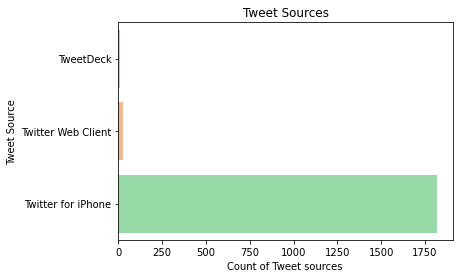

In [117]:
import seaborn as sns 
tweet_source = tweet_df.groupby('source').count()['tweet_id']
fig = sns.barplot(y = tweet_source.index, x = tweet_source.values, palette = 'pastel' )
fig.set(xlabel = 'Count of Tweet sources ' , ylabel = 'Tweet Source' , title = 'Tweet Sources')
plt.show()

As we can see the most tweet source is from Iphone
Then from web and the lowest it is from Tweetdeck useres.

### Is There any Relationship Between Count of retweets And Count of favorites?

Text(0, 0.5, 'Favorites')

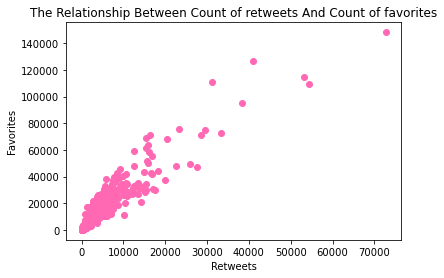

In [118]:
plt.scatter(tweet_df['retweets'], tweet_df['favorites'] , color = 'hotpink')
plt.title('The Relationship Between Count of retweets And Count of favorites')
plt.xlabel('Retweets')
plt.ylabel('Favorites')

There is a Strong positive relationship 
The more Retweets there are , the more Favorites.

### What are the most repeated words in the tweets of WeRateDogs account ?

In [38]:
text_word = " ".join(review for review in tweet_df.text)
print ("There are {} words in the combination of all review.".format(len(text_word)))

There are 239653 words in the combination of all review.


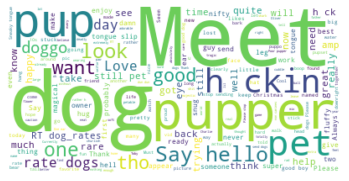

In [41]:
stopwords = set(STOPWORDS)
stopwords.update(["https", "MgUWQ76dJU", "t", "bldqew2ijj" , "CO", "af"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_word)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

for fun, the most repeated words are:

- Meet
- Pupper
- Dog
- Pet
- Love

In [43]:
wordcloud.to_file("imgw.png")

Resources:
    https://www.datacamp.com/community/tutorials/wordcloud-python
    
   https://stackoverflow.com/questions/44703945/pandas-trouble-stripping-html-tags-from-dataframe-column
    